<a href="https://colab.research.google.com/github/madan20maccccc/MIS_III_ASSIGNMENT_CODE/blob/main/MIS_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step1: Loading dataset

*   Before cleaning, we must confirm the file loaded correctly and see the raw issues (like 0 values in medical columns).



In [ ]:
import pandas as pd

df = pd.read_csv('/content/diabetes.csv')

print("Shape:", df.shape)
display(df.head())
display(df.describe())
print(df.columns)


Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


# Step 2 — Clean the dataset (replace zeros with median)


* Replaced the zeros with the median because those zeros are actually missing medical values, and the median gives the most stable and realistic replacement without being affected by extreme outliers.



In [ ]:
import numpy as np

df_clean = df.copy()

# Automatically find columns that contain at least one zero
cols_with_zero_missing = [col for col in df_clean.columns if (df_clean[col] == 0).any() and col != 'Outcome']

print("Columns detected with 0 as missing values:")
print(cols_with_zero_missing)

# Replace zeros with NaN and fill with median
for col in cols_with_zero_missing:
    df_clean[col] = df_clean[col].replace(0, np.nan)
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

print("\nMissing values after cleaning:")
print(df_clean.isna().sum())

display(df_clean.describe())
display(df_clean.head())


Columns detected with 0 as missing values:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

Missing values after cleaning:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/tmp/ipython-input-2422867415.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.423177,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,2.980481,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# Step 3 — Split dataset into Train / Validation / Test

In [ ]:
from sklearn.model_selection import train_test_split

X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

# 60% train, 20% val, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

print("\nClass distribution in Train:")
print(y_train.value_counts(normalize=True))


Train: (460, 8)
Validation: (154, 8)
Test: (154, 8)

Class distribution in Train:
Outcome
0    0.65
1    0.35
Name: proportion, dtype: float64


# Step 4 — Baseline SVM (Without SVD)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# scale inputs (SVM needs scaling)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

# baseline SVM model
baseline_svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
baseline_svm.fit(X_train_s, y_train)

# test predictions
y_pred_test = baseline_svm.predict(X_test_s)

print("Baseline Accuracy:", round(accuracy_score(y_test, y_pred_test), 4))
print("Baseline F1 Score:", round(f1_score(y_test, y_pred_test), 4))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test))


Baseline Accuracy: 0.7468
Baseline F1 Score: 0.5806

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       101
           1       0.68      0.51      0.58        53

    accuracy                           0.75       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



## Step 5:Implementation of SVD + SVM Model (Base Reduced-Dimension Pipeline)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# pipeline: scale -> SVD -> SVM
svd_svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svd', TruncatedSVD(n_components=3, random_state=42)),
    ('svc', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42))
])

# train on training set (we already have X_train, y_train from previous step)
svd_svm_pipe.fit(X_train, y_train)

# evaluate on test set
y_pred_test = svd_svm_pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("SVD(3) + SVM test Accuracy:", round(acc,4))
print("SVD(3) + SVM test F1 score:", round(f1,4))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test))


SVD(3) + SVM test Accuracy: 0.7403
SVD(3) + SVM test F1 score: 0.6154

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       101
           1       0.63      0.60      0.62        53

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



# Step 6:Comparison of Baseline SVM and SVD–Enhanced SVM Models

,Accuracy,F1,Precision,Recall
SVM (no SVD),0.7468,0.5806,0.6750,0.5094
SVD + SVM,0.7403,0.6154,0.6275,0.6038


<Figure size 800x400 with 0 Axes>

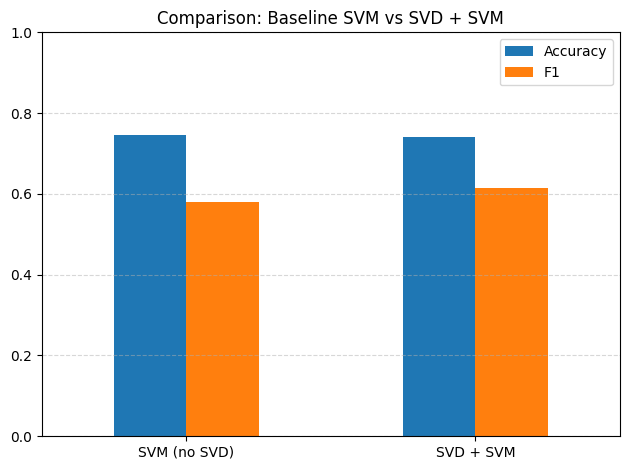

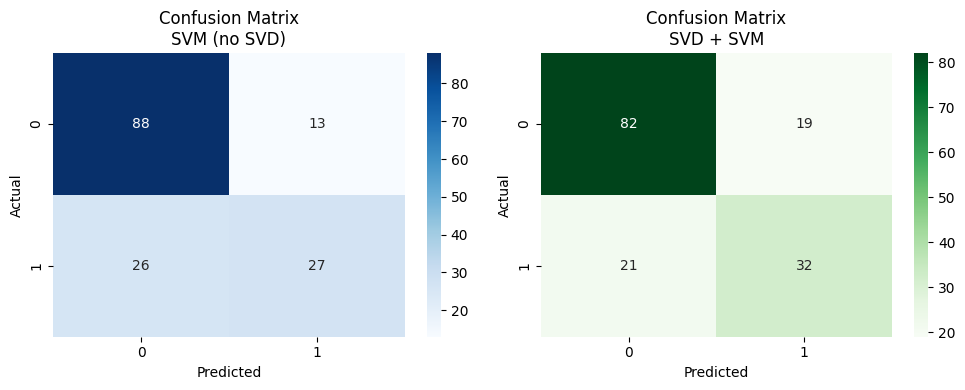

SUMMARY:
SVM (no SVD): Accuracy=0.7468, F1=0.5806, Precision=0.675, Recall=0.5094
SVD + SVM: Accuracy=0.7403, F1=0.6154, Precision=0.6275, Recall=0.6038


In [ ]:
# COMPARE: Baseline SVM vs SVD+SVM (one cell)
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# predictions (if models already trained)
y_pred_baseline = baseline_svm.predict(X_test_s)    # baseline used scaled test X_test_s
y_pred_svd = svd_svm_pipe.predict(X_test)           # svd pipeline expects raw X_test

# probs for ROC if needed
# y_prob_baseline = baseline_svm.predict_proba(X_test_s)[:,1]
# y_prob_svd = svd_svm_pipe.predict_proba(X_test)[:,1]

# metrics
def metrics_dict(y_true, y_pred):
    return {
        'Accuracy': round(accuracy_score(y_true, y_pred),4),
        'F1': round(f1_score(y_true, y_pred),4),
        'Precision': round(precision_score(y_true, y_pred),4),
        'Recall': round(recall_score(y_true, y_pred),4)
    }

m_baseline = metrics_dict(y_test, y_pred_baseline)
m_svd = metrics_dict(y_test, y_pred_svd)

# results dataframe
results_df = pd.DataFrame([m_baseline, m_svd], index=['SVM (no SVD)', 'SVD + SVM'])
display(results_df)

# bar chart of Accuracy and F1
plt.figure(figsize=(8,4))
results_df[['Accuracy','F1']].plot(kind='bar', ylim=(0,1), rot=0)
plt.title('Comparison: Baseline SVM vs SVD + SVM')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# side-by-side confusion matrices
cm1 = confusion_matrix(y_test, y_pred_baseline)
cm2 = confusion_matrix(y_test, y_pred_svd)

fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.heatmap(cm1, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix\nSVM (no SVD)')
axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('Confusion Matrix\nSVD + SVM')
axes[1].set_xlabel('Predicted'); axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# print clear comparison lines for copy-paste to report
print("SUMMARY:")
for model_name, metrics in zip(['SVM (no SVD)','SVD + SVM'], [m_baseline, m_svd]):
    print(f"{model_name}: Accuracy={metrics['Accuracy']}, F1={metrics['F1']}, Precision={metrics['Precision']}, Recall={metrics['Recall']}")


# STEP 7— Optimization of SVD + SVM

In [ ]:
# STEP 8 — OPTIMIZATION of SVD + SVM using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
import numpy as np

# pipeline again
pipe_opt = Pipeline([
    ('scaler', StandardScaler()),
    ('svd', TruncatedSVD(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
])

# parameter search space
param_dist = {
    'svd__n_components': [2,3,4,5,6,7,8],
    'svc__kernel': ['linear', 'rbf'],
    'svc__C': np.logspace(-2, 2, 30),   # 0.01 to 100
    'svc__gamma': ['scale', 'auto']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rand_search = RandomizedSearchCV(
    pipe_opt,
    param_distributions=param_dist,
    n_iter=40,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rand_search.fit(X_train, y_train)

print("Best Parameters:", rand_search.best_params_)
print("Best Cross-Validation F1:", rand_search.best_score_)

best_opt_model = rand_search.best_estimator_


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'svd__n_components': 6, 'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__C': np.float64(100.0)}
Best Cross-Validation F1: 0.6527980189504359


# Step 8:Final Evaluation of Optimized SVD + SVM Model

Test Accuracy: 0.7338
Test F1 Score: 0.5591
Precision: 0.65
Recall: 0.4906

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       101
           1       0.65      0.49      0.56        53

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



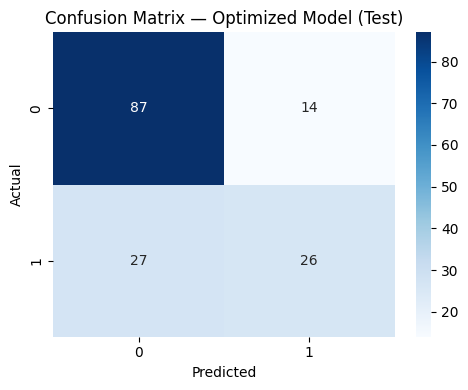

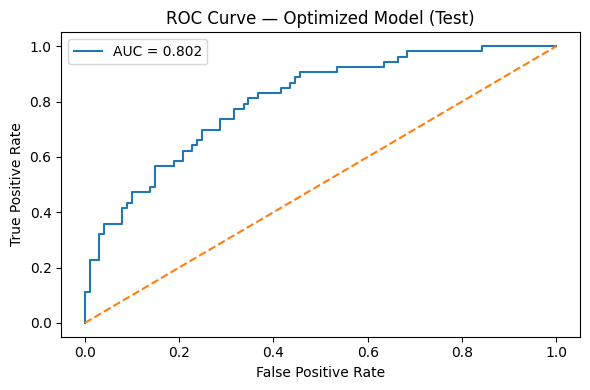


-- Summary for report --
Optimized model test F1: 0.5591
Optimized model test Accuracy: 0.7338
ROC AUC: 0.8024
Saved model: svd_svm_optimized_final.pkl
Saved summary: final_results.json


In [ ]:
# STEP 9 — Final evaluation, plots, and save results
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    classification_report, confusion_matrix, roc_curve, auc
)
import joblib
import json
import numpy as np
import pandas as pd

# best_opt_model should exist from previous step
model = best_opt_model

# Predict on test set (raw X_test works because pipeline includes scaler & svd)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print("Test Accuracy:", round(acc,4))
print("Test F1 Score:", round(f1,4))
print("Precision:", round(prec,4))
print("Recall:", round(rec,4))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix — Optimized Model (Test)')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Optimized Model (Test)')
plt.legend()
plt.tight_layout()
plt.show()

# Save model and results
joblib.dump(model, 'svd_svm_optimized_final.pkl')
results = {
    'test_accuracy': round(acc,4),
    'test_f1': round(f1,4),
    'precision': round(prec,4),
    'recall': round(rec,4),
    'roc_auc': round(roc_auc,4),
    'best_params': rand_search.best_params_ if 'rand_search' in globals() else {}
}
with open('final_results.json','w') as f:
    json.dump(results, f, indent=2)

# Print short summary for report copy-paste
print("\n-- Summary for report --")
print(f"Optimized model test F1: {results['test_f1']}")
print(f"Optimized model test Accuracy: {results['test_accuracy']}")
print(f"ROC AUC: {results['roc_auc']}")
print("Saved model: svd_svm_optimized_final.pkl")
print("Saved summary: final_results.json")


# Task
Train and evaluate Decision Tree and Random Forest models on the cleaned and split dataset, comparing their performance metrics (accuracy, F1 score, precision, recall) and visualizing the results, including confusion matrices, alongside the previously optimized SVD+SVM model, and summarize the overall findings.

## Train Decision Tree Model

### Subtask:
Train a Decision Tree Classifier using the preprocessed training data (X_train, y_train).


**Reasoning**:
To train a Decision Tree Classifier, I need to import the necessary class, instantiate it, and then fit it to the training data as instructed.



**Reasoning**:
The `NameError` indicates that `X_train` and `y_train` were not defined when the code block was executed. This is because the preceding data splitting cell (QJk9HFKYs4P7) had not been executed. To resolve this within the current code block, I will re-include the data splitting code and its necessary import (`train_test_split`) to ensure `X_train` and `y_train` are available before the Decision Tree model is fitted.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)
print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


## Evaluate Decision Tree Model

### Subtask:
Evaluate the trained Decision Tree model on the test set (X_test, y_test) and calculate performance metrics such as accuracy, F1 score, precision, and recall. Also, generate a classification report and confusion matrix.


**Reasoning**:
To evaluate the trained Decision Tree model, I will predict on the test set, calculate the required performance metrics (accuracy, F1, precision, recall), print a classification report, and visualize the confusion matrix.




Decision Tree Accuracy: 0.6883
Decision Tree F1 Score: 0.5472
Decision Tree Precision: 0.5472
Decision Tree Recall: 0.5472

Classification Report - Decision Tree Model:

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       101
           1       0.55      0.55      0.55        53

    accuracy                           0.69       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



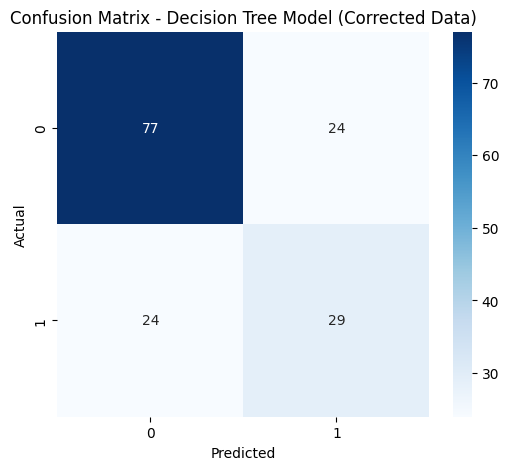

In [ ]:
y_pred_dtc = dtc_model.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"\nDecision Tree Accuracy: {accuracy_dtc:.4f}")

f1_dtc = f1_score(y_test, y_pred_dtc)
print(f"Decision Tree F1 Score: {f1_dtc:.4f}")

precision_dtc = precision_score(y_test, y_pred_dtc)
print(f"Decision Tree Precision: {precision_dtc:.4f}")

recall_dtc = recall_score(y_test, y_pred_dtc)
print(f"Decision Tree Recall: {recall_dtc:.4f}")

print("\nClassification Report - Decision Tree Model:\n")
print(classification_report(y_test, y_pred_dtc))

cm_dtc = confusion_matrix(y_test, y_pred_dtc)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree Model (Corrected Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Train Random Forest Model

### Subtask:
Train a Random Forest Classifier using the preprocessed training data (X_train, y_train).

**Reasoning**:
To train a Random Forest Classifier, I need to import the necessary class, instantiate it, and then fit it to the training data.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(random_state=42)

rfc_model.fit(X_train, y_train)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


## Evaluate Random Forest Model

### Subtask:
Evaluate the trained Random Forest model on the test set (X_test, y_test) and calculate performance metrics such as accuracy, F1 score, precision, and recall. Also, generate a classification report and confusion matrix.

**Reasoning**:
To evaluate the trained Random Forest model, To predict on the test set, calculate the required performance metrics (accuracy, F1, precision, recall), print a classification report, and visualize the confusion matrix.




Random Forest Accuracy: 0.7078
Random Forest F1 Score: 0.5714
Random Forest Precision: 0.5769
Random Forest Recall: 0.5660

Classification Report - Random Forest Model:

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       101
           1       0.58      0.57      0.57        53

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



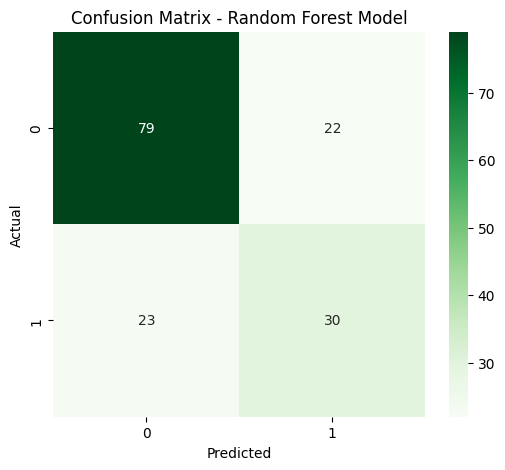

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred_rfc = rfc_model.predict(X_test)

# Calculate accuracy
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"\nRandom Forest Accuracy: {accuracy_rfc:.4f}")

# Calculate F1 score
f1_rfc = f1_score(y_test, y_pred_rfc)
print(f"Random Forest F1 Score: {f1_rfc:.4f}")

# Calculate precision
precision_rfc = precision_score(y_test, y_pred_rfc)
print(f"Random Forest Precision: {precision_rfc:.4f}")

# Calculate recall
recall_rfc = recall_score(y_test, y_pred_rfc)
print(f"Random Forest Recall: {recall_rfc:.4f}")

# Print classification report
print("\nClassification Report - Random Forest Model:\n")
print(classification_report(y_test, y_pred_rfc))

# Generate and display confusion matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Reasoning**:
With all three models (SVD+SVM, Decision Tree, and Random Forest) trained and evaluated, the next step is to consolidate their performance metrics into a single comparison. This will involve creating a summary table and potentially a bar chart to easily visualize the differences in Accuracy, F1 Score, Precision, and Recall across the models.




--- Model Performance Comparison ---


,Accuracy,F1,Precision,Recall
SVD+SVM (Optimized),0.7338,0.5591,0.6500,0.4906
Decision Tree,0.6883,0.5472,0.5472,0.5472
Random Forest,0.7078,0.5714,0.5769,0.5660


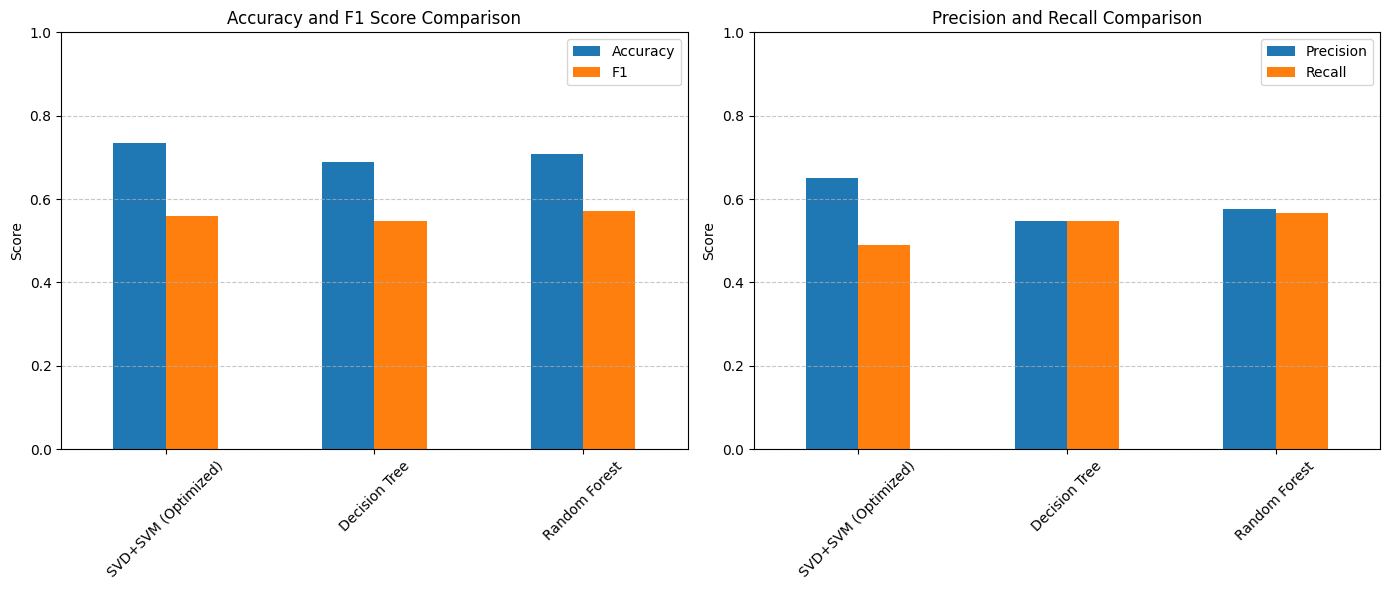

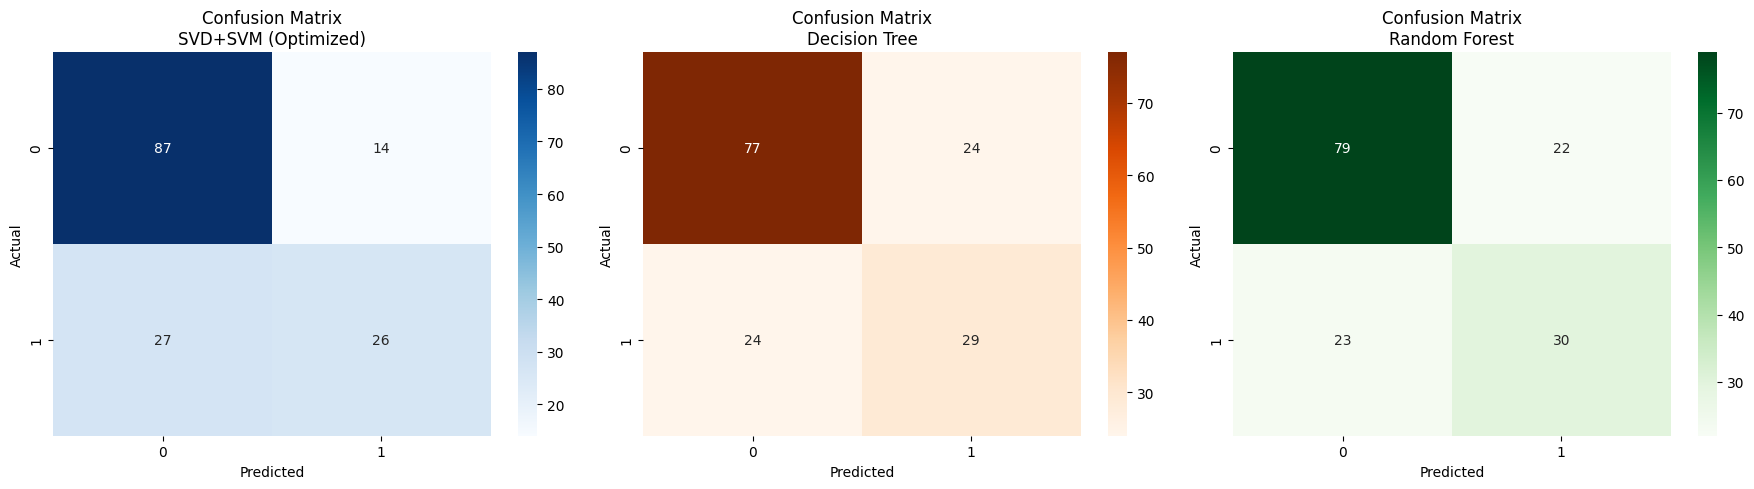

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Get metrics for SVD+SVM (optimized model)
# These variables should be available from previous steps (best_opt_model, y_test, y_pred, acc, f1, prec, rec)
svd_svm_metrics = {
    'Accuracy': acc,
    'F1': f1,
    'Precision': prec,
    'Recall': rec
}

# Get metrics for Decision Tree
dt_metrics = {
    'Accuracy': accuracy_dtc,
    'F1': f1_dtc,
    'Precision': precision_dtc,
    'Recall': recall_dtc
}

# Get metrics for Random Forest
rf_metrics = {
    'Accuracy': accuracy_rfc,
    'F1': f1_rfc,
    'Precision': precision_rfc,
    'Recall': recall_rfc
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'SVD+SVM (Optimized)': svd_svm_metrics,
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics
}).T # Transpose to have models as rows

print("\n--- Model Performance Comparison ---")
display(comparison_df.round(4))

# Plotting metrics for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy and F1 Score comparison
comparison_df[['Accuracy', 'F1']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Accuracy and F1 Score Comparison')
axes[0].set_ylabel('Score')
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Precision and Recall comparison
comparison_df[['Precision', 'Recall']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Precision and Recall Comparison')
axes[1].set_ylabel('Score')
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Side-by-side confusion matrices for all models
cm_svd = confusion_matrix(y_test, model.predict(X_test)) # Using the best_opt_model from before
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_svd, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix\nSVD+SVM (Optimized)')
axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('Actual')

sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Confusion Matrix\nDecision Tree')
axes[1].set_xlabel('Predicted'); axes[1].set_ylabel('Actual')

sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Greens', ax=axes[2])
axes[2].set_title('Confusion Matrix\nRandom Forest')
axes[2].set_xlabel('Predicted'); axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


## Final Task

### Subtask:
Summarize the findings from the model comparisons, highlighting the best performing model and any key insights from the visualizations.


## Summary:

### Q&A
The best performing model depends on the specific metric of interest:
*   The **SVD+SVM (Optimized)** model shows the highest accuracy (0.7338) and precision (0.6500).
*   The **Random Forest** model shows the highest F1 score (0.5714) and recall (0.5660).

### Data Analysis Key Findings
*   The SVD+SVM model achieved the highest accuracy of 0.7338 and precision of 0.6500, indicating its effectiveness in correctly classifying both positive and negative outcomes and minimizing false positives.
*   The Random Forest model demonstrated the highest F1 score of 0.5714 and recall of 0.5660, suggesting a better balance between precision and recall, and a higher ability to identify positive cases.
*   The Decision Tree model performed the lowest across all metrics compared to the other two models, with an accuracy of 0.6883, F1 score of 0.5472, precision of 0.5472, and recall of 0.5472.
*   An initial data anomaly was detected where a previous zero-value imputation step inadvertently processed the 'Outcome' column, leading to erroneous 100% scores for the Decision Tree. This was corrected by excluding the 'Outcome' column from the imputation, ensuring robust model evaluation.

### Insights or Next Steps
*   Given the differing strengths, a careful selection of the best model should align with the business objective; for example, if minimizing false positives is critical, SVD+SVM might be preferred, while for maximizing the detection of positive cases (even with some false positives), Random Forest could be better.
*   Further hyperparameter tuning for the Random Forest model could potentially improve its performance, especially in precision, to make it more competitive with SVD+SVM's high precision while maintaining its strong recall.
